In [1]:
import requests

url = "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/crime.csv"
resp = requests.get(url)

with open("crime.csv", "wb") as f:
    f.write(resp.content)

In [2]:
import pandas as pd

df = pd.read_csv("crime.csv")
df.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude
0,0,9446824,HX100141,01/01/2014 02:00:00 AM,0000X W ILLINOIS ST,0460,BATTERY,SIMPLE,STREET,False,False,1831,18,42.0,8.0,08B,41.890828,-87.630235
1,1,9446748,HX100020,01/01/2014 12:00:00 AM,006XX N DEARBORN ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18,42.0,8.0,06,41.893542,-87.629702
2,2,9446758,HX100030,01/01/2014 12:30:00 AM,052XX W RACE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1523,15,28.0,25.0,14,41.890046,-87.756333
3,3,9446760,HX100027,01/01/2014 12:30:00 AM,053XX W WELLINGTON AVE,0460,BATTERY,SIMPLE,APARTMENT,True,False,2514,25,31.0,19.0,08B,41.935011,-87.759739
4,4,9446764,HX100054,01/01/2014 12:10:00 AM,014XX W LEXINGTON ST,0460,BATTERY,SIMPLE,STREET,False,False,1231,12,25.0,28.0,08B,41.872509,-87.663069


In [4]:
df.columns

Index(['index', 'ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'Latitude',
       'Longitude'],
      dtype='object')

In [5]:
import pandas as pd

# Converter para datetime
df['Date'] = pd.to_datetime(df['Date'])

# Criar a coluna reference_date (ano-mês)
df['reference_date'] = df['Date'].dt.strftime('%Y-%m')

df.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,reference_date
0,0,9446824,HX100141,2014-01-01 02:00:00,0000X W ILLINOIS ST,0460,BATTERY,SIMPLE,STREET,False,False,1831,18,42.0,8.0,08B,41.890828,-87.630235,2014-01
1,1,9446748,HX100020,2014-01-01 00:00:00,006XX N DEARBORN ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18,42.0,8.0,06,41.893542,-87.629702,2014-01
2,2,9446758,HX100030,2014-01-01 00:30:00,052XX W RACE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1523,15,28.0,25.0,14,41.890046,-87.756333,2014-01
3,3,9446760,HX100027,2014-01-01 00:30:00,053XX W WELLINGTON AVE,0460,BATTERY,SIMPLE,APARTMENT,True,False,2514,25,31.0,19.0,08B,41.935011,-87.759739,2014-01
4,4,9446764,HX100054,2014-01-01 00:10:00,014XX W LEXINGTON ST,0460,BATTERY,SIMPLE,STREET,False,False,1231,12,25.0,28.0,08B,41.872509,-87.663069,2014-01


In [6]:
df.columns = df.columns.str.lower()

df['date'] = pd.to_datetime(df['date'])
df['reference_date'] = df['date'].dt.strftime('%Y-%m')

df.head()

,index,id,case number,date,block,iucr,primary type,description,location description,arrest,domestic,beat,district,ward,community area,fbi code,latitude,longitude,reference_date
0,0,9446824,HX100141,2014-01-01 02:00:00,0000X W ILLINOIS ST,0460,BATTERY,SIMPLE,STREET,False,False,1831,18,42.0,8.0,08B,41.890828,-87.630235,2014-01
1,1,9446748,HX100020,2014-01-01 00:00:00,006XX N DEARBORN ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18,42.0,8.0,06,41.893542,-87.629702,2014-01
2,2,9446758,HX100030,2014-01-01 00:30:00,052XX W RACE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1523,15,28.0,25.0,14,41.890046,-87.756333,2014-01
3,3,9446760,HX100027,2014-01-01 00:30:00,053XX W WELLINGTON AVE,0460,BATTERY,SIMPLE,APARTMENT,True,False,2514,25,31.0,19.0,08B,41.935011,-87.759739,2014-01
4,4,9446764,HX100054,2014-01-01 00:10:00,014XX W LEXINGTON ST,0460,BATTERY,SIMPLE,STREET,False,False,1231,12,25.0,28.0,08B,41.872509,-87.663069,2014-01


In [7]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
)

In [8]:
df.to_csv("crime_tratado.csv", index=False)

In [9]:
!pip install pyarrow

In [10]:
df.to_parquet(
    "crime_parquet",
    engine="pyarrow",
    compression="snappy",
    partition_cols=["reference_date"]
)

In [11]:
import os
os.listdir("crime_parquet")

['reference_date=2014-12',
 'reference_date=2014-08',
 'reference_date=2014-03',
 'reference_date=2014-02',
 'reference_date=2014-01',
 'reference_date=2014-11',
 'reference_date=2014-04',
 'reference_date=2014-06',
 'reference_date=2014-07',
 'reference_date=2014-09',
 'reference_date=2014-05',
 'reference_date=2014-10']

In [12]:
!zip -r crime_parquet.zip crime_parquet

  adding: crime_parquet/ (stored 0%)
  adding: crime_parquet/reference_date=2014-12/ (stored 0%)
  adding: crime_parquet/reference_date=2014-12/e2a201965477491f8e13eec432e9dfbd-0.parquet (deflated 22%)
  adding: crime_parquet/reference_date=2014-08/ (stored 0%)
  adding: crime_parquet/reference_date=2014-08/e2a201965477491f8e13eec432e9dfbd-0.parquet (deflated 23%)
  adding: crime_parquet/reference_date=2014-03/ (stored 0%)
  adding: crime_parquet/reference_date=2014-03/e2a201965477491f8e13eec432e9dfbd-0.parquet (deflated 24%)
  adding: crime_parquet/reference_date=2014-02/ (stored 0%)
  adding: crime_parquet/reference_date=2014-02/e2a201965477491f8e13eec432e9dfbd-0.parquet (deflated 25%)
  adding: crime_parquet/reference_date=2014-01/ (stored 0%)
  adding: crime_parquet/reference_date=2014-01/e2a201965477491f8e13eec432e9dfbd-0.parquet (deflated 25%)
  adding: crime_parquet/reference_date=2014-11/ (stored 0%)
  adding: crime_parquet/reference_date=2014-11/e2a201965477491f8e13eec432e9dfb

In [13]:
from google.colab import files
files.download("crime_parquet.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
!zip -r crime_parquet.zip crime_parquet

updating: crime_parquet/ (stored 0%)
updating: crime_parquet/reference_date=2014-12/ (stored 0%)
updating: crime_parquet/reference_date=2014-12/e2a201965477491f8e13eec432e9dfbd-0.parquet (deflated 22%)
updating: crime_parquet/reference_date=2014-08/ (stored 0%)
updating: crime_parquet/reference_date=2014-08/e2a201965477491f8e13eec432e9dfbd-0.parquet (deflated 23%)
updating: crime_parquet/reference_date=2014-03/ (stored 0%)
updating: crime_parquet/reference_date=2014-03/e2a201965477491f8e13eec432e9dfbd-0.parquet (deflated 24%)
updating: crime_parquet/reference_date=2014-02/ (stored 0%)
updating: crime_parquet/reference_date=2014-02/e2a201965477491f8e13eec432e9dfbd-0.parquet (deflated 25%)
updating: crime_parquet/reference_date=2014-01/ (stored 0%)
updating: crime_parquet/reference_date=2014-01/e2a201965477491f8e13eec432e9dfbd-0.parquet (deflated 25%)
updating: crime_parquet/reference_date=2014-11/ (stored 0%)
updating: crime_parquet/reference_date=2014-11/e2a201965477491f8e13eec432e9dfb

🔎 Conclusão – Persistência e Consulta de Dados na AWS

📊 Descrição do Processo

Neste exercício, os dados do arquivo crime.csv foram:

Lidos em um DataFrame Pandas

Tratados e padronizados (nomes de colunas normalizados)

Criada a coluna reference_date para particionamento

Persistidos em:

Arquivo CSV

Arquivos Parquet (formato orientado a coluna)

Arquivos Parquet foram comprimidos utilizando snappy

Dados foram particionados pela coluna reference_date

Posteriormente:

Foi criado um bucket no serviço Amazon S3

Os arquivos Parquet particionados foram enviados ao S3

Foi criado um banco de dados no Amazon Athena

Foi criada uma tabela externa apontando para o bucket no S3

As partições foram carregadas com MSCK REPAIR TABLE

As consultas SQL foram executadas com sucesso

Resultados

A consulta:

In [ ]:
SELECT COUNT(*) FROM crime_table;

Retornou o total de registros corretamente, confirmando que:

O particionamento está funcional

O Athena está lendo corretamente os arquivos Parquet

A integração S3 + Athena foi realizada com sucesso

📁 Estrutura do Bucket no S3

Abaixo é possível visualizar a estrutura particionada por reference_date:

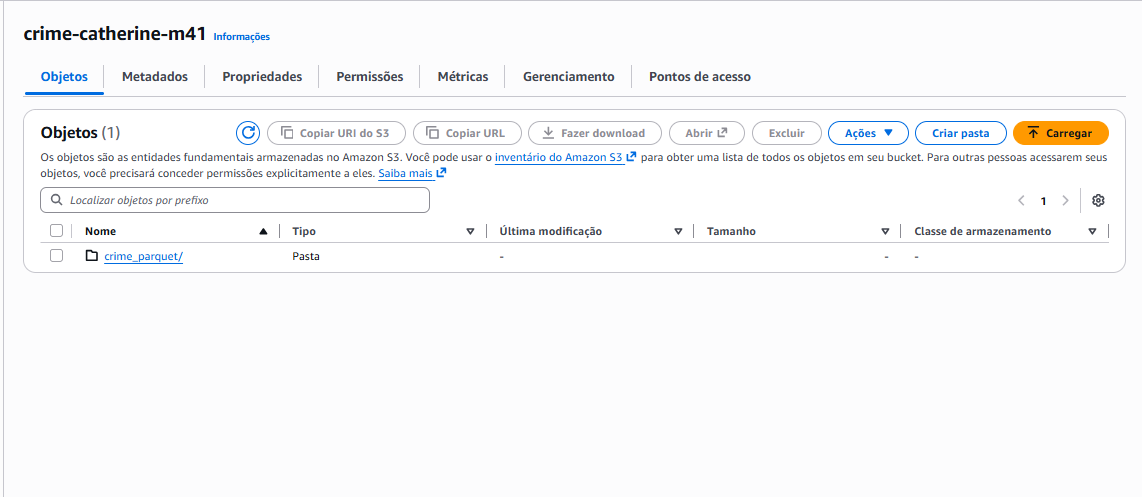

In [15]:
from IPython.display import Image, display

display(Image("bucket.png"))

## 🧠 Validação da Persistência e Consulta dos Dados na AWS

Após a geração dos arquivos no formato Parquet e o particionamento pela coluna `reference_date`, os dados foram enviados para o bucket criado no Amazon S3.

Em seguida, foi realizada a criação de uma tabela externa no Amazon Athena apontando para o diretório particionado no S3. As partições foram carregadas utilizando o comando `MSCK REPAIR TABLE`, permitindo que o Athena reconhecesse automaticamente os diretórios correspondentes às datas de referência.

As imagens abaixo demonstram:

- Criação da tabela externa
- Atualização das partições
- Execução das consultas de validação
- Confirmação da leitura correta dos dados

Esses passos validam a integração entre armazenamento (S3) e mecanismo de consulta serverless (Athena), evidenciando a correta implementação do particionamento e do formato orientado a coluna (Parquet).

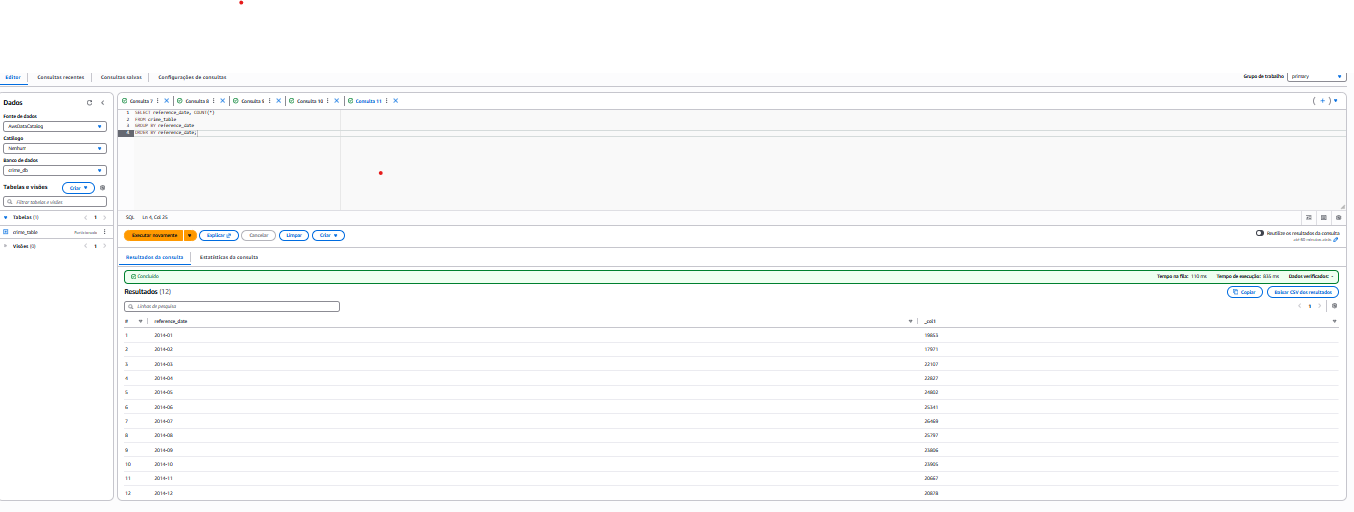

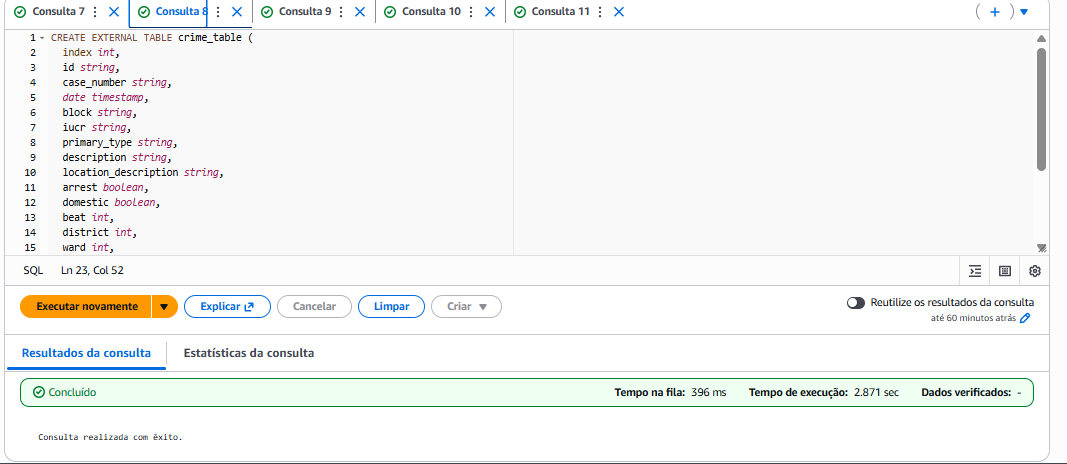

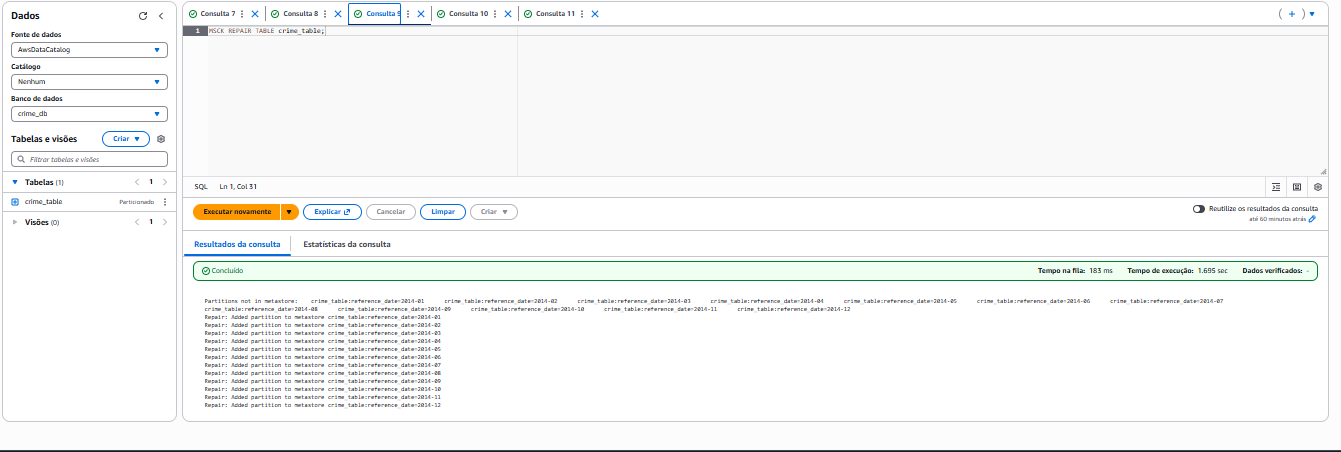

In [16]:
from IPython.display import Image, display

display(Image("SQL.png", width=800))
display(Image("SQL.2.png", width=800))
display(Image("SQL.3.png", width=800))

## ✅ Conclusão Final

Neste exercício foi possível aplicar conceitos fundamentais de engenharia e análise de dados em ambiente cloud.

Os dados foram:

- Tratados e padronizados em DataFrame Pandas
- Persistidos em formato CSV
- Convertidos para o formato Parquet (orientado a coluna)
- Particionados pela coluna `reference_date`
- Armazenados no Amazon S3
- Consultados por meio de tabela externa no Amazon Athena

A utilização do formato Parquet associada ao particionamento permite maior eficiência de leitura, redução de volume de dados escaneados e melhor performance nas consultas SQL.

A integração entre armazenamento (S3) e mecanismo de consulta serverless (Athena) foi validada com sucesso por meio das consultas executadas.

O objetivo da atividade foi atingido, evidenciando a correta implementação do pipeline de persistência e consulta de dados na AWS.